# 데이터 임포트

In [ ]:
! mkdir data
! unzip /content/drive/MyDrive/projects/oden_anomalydetection/wando_sample.zip -d data

���� ���͸� �Ǵ� ���� data��(��) �̹� �ֽ��ϴ�.


'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import pandas as pd
import ast

In [ ]:
df1 = pd.read_excel("E:/경북대/3학년 2학기/design1/biocode/11-03data/wando01.xlsx")
df2 = pd.read_excel("E:/경북대/3학년 2학기/design1/biocode/11-03data/wando01b.xlsx")
df3 = pd.read_excel("E:/경북대/3학년 2학기/design1/biocode/11-03data/wando02.xlsx")

In [ ]:
df = pd.concat([df1, df2, df3]).reset_index(drop=True)

In [ ]:
df.isnull().sum()

device_id        0
device_type      0
measure_time     0
serial_number    0
coordinates      0
temperature      0
oxygen_mpl       0
oxygen_per       0
oxygen_ppm       0
date_time        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# 데이터 전처리 및 EDA

In [ ]:
import matplotlib.pyplot as plt
df.columns

Index(['device_id', 'device_type', 'measure_time', 'serial_number',
       'coordinates', 'temperature', 'oxygen_mpl', 'oxygen_per', 'oxygen_ppm',
       'date_time'],
      dtype='object')

In [ ]:
df = df[['device_id', 'date_time', 'temperature', 'oxygen_ppm']]

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
col_li = ['temperature', 'oxygen_ppm']

In [ ]:
for col in col_li:
  df[col] = df[col].apply(ast.literal_eval)
  df[col] = df[col].apply(lambda x: x['value'])

In [ ]:
pd.to_datetime(df['date_time'])

0        2024-05-23 02:18:28
1        2024-05-23 02:20:00
2        2024-05-23 02:21:33
3        2024-05-23 02:23:05
4        2024-05-23 02:28:28
                 ...        
327367   2024-11-03 05:21:23
327368   2024-11-03 05:23:37
327369   2024-11-03 05:24:42
327370   2024-11-03 05:25:46
327371   2024-11-03 05:26:50
Name: date_time, Length: 327372, dtype: datetime64[ns]

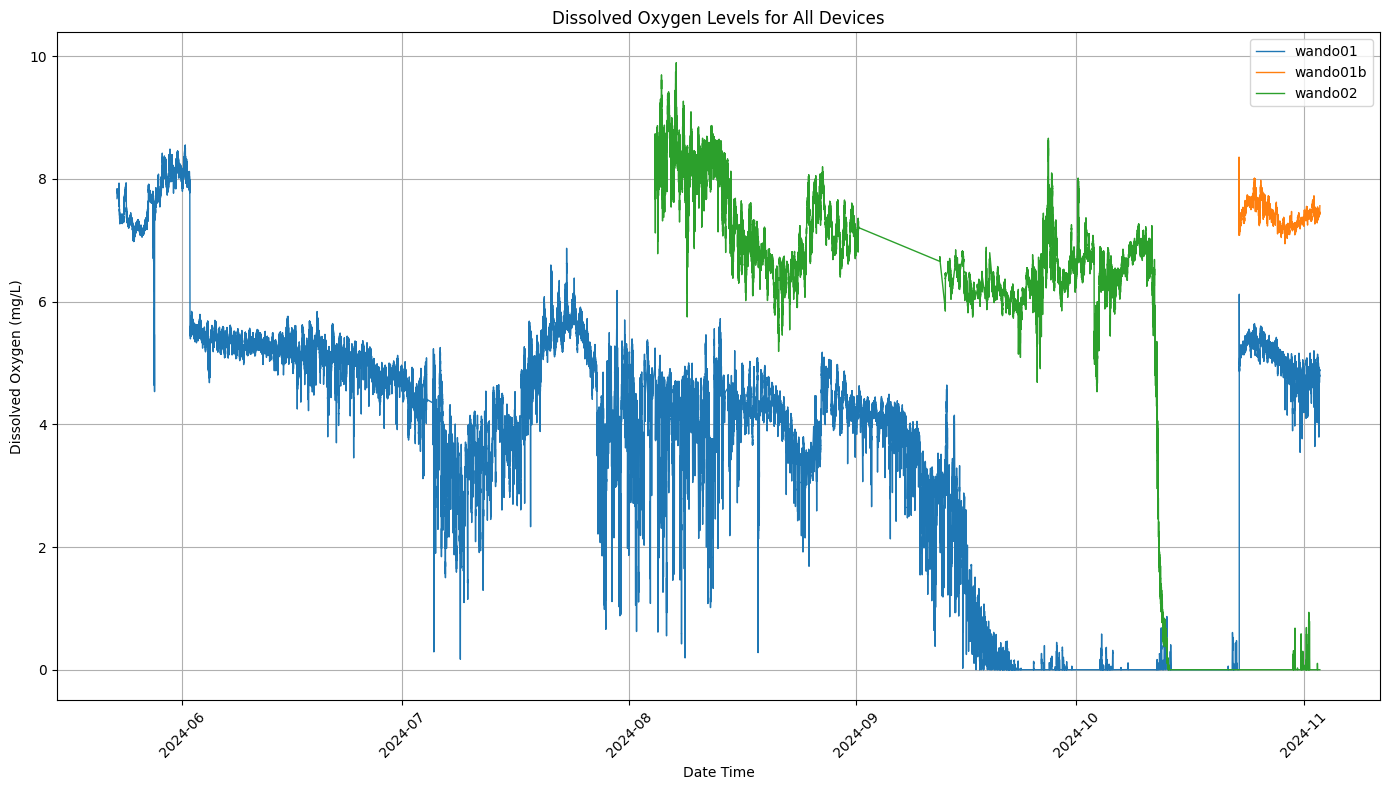

In [ ]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(14, 8))

# 전체 데이터를 디바이스별로 시각화
for device_id in df['device_id'].unique():
    device_data = df[df['device_id'] == device_id]

    # 모든 데이터 시각화
    plt.plot(device_data['date_time'], device_data['oxygen_ppm'], label=f'{device_id}', linewidth=1)

# 그래프 세부 설정
plt.title('Dissolved Oxygen Levels for All Devices')
plt.xlabel('Date Time')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#분석 1 용존 산소 4이상, timestamp 1000

import pandas as pd
import numpy as np

# 데이터 초기화 및 설정
df['state'] = ''

# abnormal_df와 normal_df 초기화
abnormal_df_li = []
normal_df_li = []

# 각 device_id별로 반복
for device_id in df['device_id'].unique():
    # 특정 device_id에 해당하는 데이터만 필터링하고 인덱스 재설정
    device_data = df[df['device_id'] == device_id].copy().reset_index(drop=True)

    # 초기 설정
    i = 0
    start = 0
    check = False
    
    # while 루프를 통한 상태 업데이트
    while i < len(device_data):
        if not check:
            # 기준점 이상이 될때까지 데이터 기록 안함
            if device_data['oxygen_ppm'].iloc[i] > 5.0:
                start = i
                check = True
            else:
                device_data.loc[i, 'state'] = 'biofouling'
                
        else:
            # 용존산소가 처음 기준점 이하로 되는 시점
            
            if device_data['oxygen_ppm'].iloc[i] <= 4.0 :
                # 특정 범위에 'abnormal' 할당
                for j in range(i-1000, i):
                    device_data.loc[j, 'state'] = 'abnormal'
                check = False
            else:
                # 현재 인덱스에 'normal' 할당
                device_data.loc[i, 'state'] = 'normal'
        i += 1


    set = 0   
    for h in range(len(device_data)-1):
        if device_data.loc[i] != device_data.loc[i+1]:
            if device_data.loc[i, 'state'] == 'abnormal':
                abnormal_df_li.append(device_data[set:i])
                set = i+1
            elif device_data.loc[i, 'state'] == 'normal':
                normal_df_li.append(device_data[set:i])
                set = i+1
    




KeyError: 211741

In [ ]:
def reset_index_df(df):
    df = df[df['device_id']=="wando01"].reset_index(drop=True)

In [ ]:
abnormal_df_wando01 = abnormal_df[abnormal_df['device_id']=="wando01"].reset_index(drop=True)
normal_df_wando01 = normal_df[normal_df['device_id']=="wando01"].reset_index(drop=True)

abnormal_df_wando01b = abnormal_df[abnormal_df['device_id']=="wando01b"].reset_index(drop=True)
normal_df_wando01b = normal_df[normal_df['device_id']=="wando01b"].reset_index(drop=True)

abnormal_df_wando02 = abnormal_df[abnormal_df['device_id']=="wando02"].reset_index(drop=True)
normal_df_wando02 = normal_df[normal_df['device_id']=="wando02"].reset_index(drop=True)

In [ ]:
print(abnormal_df_wando01)

      device_id           date_time  temperature  oxygen_ppm     state
0       wando01 2024-06-15 22:12:01    22.141121    5.387372  abnormal
1       wando01 2024-06-15 22:13:05    22.319923    5.428558  abnormal
2       wando01 2024-06-15 22:14:10    22.016033    5.426231  abnormal
3       wando01 2024-06-15 22:15:14    22.238619    5.437718  abnormal
4       wando01 2024-06-15 22:16:18    22.324575    5.472417  abnormal
...         ...                 ...          ...         ...       ...
47671   wando01 2024-11-03 02:06:34    20.450624    4.645630  abnormal
47672   wando01 2024-11-03 02:07:38    20.451965    4.585515  abnormal
47673   wando01 2024-11-03 02:08:42    20.449640    4.539215  abnormal
47674   wando01 2024-11-03 02:09:47    20.449579    4.543734  abnormal
47675   wando01 2024-11-03 02:10:51    20.452204    4.501466  abnormal

[47676 rows x 5 columns]


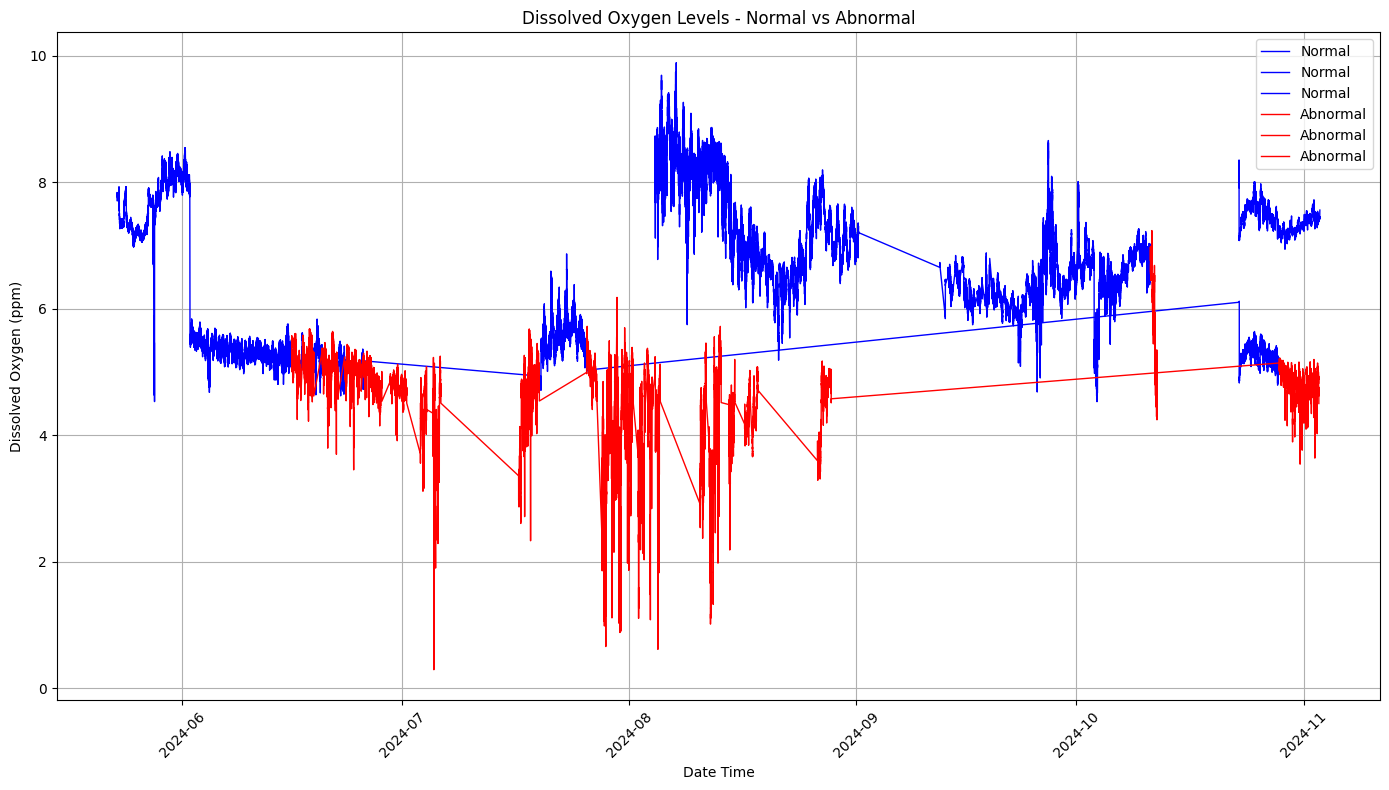

In [ ]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(14, 8))

# Normal 상태 데이터 시각화
plt.plot(normal_df_wando01['date_time'], normal_df_wando01['oxygen_ppm'], label='Normal', color='blue', linewidth=1)
plt.plot(normal_df_wando01b['date_time'], normal_df_wando01b['oxygen_ppm'], label='Normal', color='blue', linewidth=1)
plt.plot(normal_df_wando02['date_time'], normal_df_wando02['oxygen_ppm'], label='Normal', color='blue', linewidth=1)


# Abnormal 상태 데이터 시각화
plt.plot(abnormal_df_wando01['date_time'], abnormal_df_wando01['oxygen_ppm'], label='Abnormal', color='red', linewidth=1)
plt.plot(abnormal_df_wando01b['date_time'], abnormal_df_wando01b['oxygen_ppm'], label='Abnormal', color='red', linewidth=1)
plt.plot(abnormal_df_wando02['date_time'], abnormal_df_wando02['oxygen_ppm'], label='Abnormal', color='red', linewidth=1)

# 그래프 세부 설정
plt.title('Dissolved Oxygen Levels - Normal vs Abnormal')
plt.xlabel('Date Time')
plt.ylabel('Dissolved Oxygen (ppm)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
def resampling(df):
    df.set_index('date_time', inplace=True)
    df['temperature'] = df['temperature'].astype(float)
    df['oxygen_ppm'] = df['oxygen_ppm'].astype(float)

    # 2분 단위로 리샘플링 (평균값을 계산)
    df = df.resample('2min').ffill().reset_index()
    df = df.dropna()
    
    return df

print(abnormal_df_wando01b)


Empty DataFrame
Columns: [device_id, temperature, oxygen_ppm, state]
Index: []


In [ ]:
abnormal_df_wando01 = resampling(abnormal_df_wando01)
#abnormal_df_wando01b = resampling(abnormal_df_wando01b)
abnormal_df_wando02 = resampling(abnormal_df_wando02)

normal_df_wando01 = resampling(normal_df_wando01)
normal_df_wando01b = resampling(normal_df_wando01b)
normal_df_wando02 = resampling(normal_df_wando02)



In [ ]:
print(normal_df['oxygen_ppm'].quantile(0.001))
print(normal_df['oxygen_ppm'].quantile(0.01))
print(normal_df['oxygen_ppm'].quantile(0.025))
print(normal_df['oxygen_ppm'].quantile(0.05))
print(normal_df['oxygen_ppm'].quantile(0.1))
print(normal_df['oxygen_ppm'].quantile(0.2))
print(normal_df['oxygen_ppm'].quantile(0.3))

4.778745760917664
5.043727731704712
5.131009936332703
5.196383833885193
5.283986806869507
5.46055030822754
5.970914602279663


In [ ]:
print(abnormal_df['oxygen_ppm'].quantile(0.1))
print(abnormal_df['oxygen_ppm'].quantile(0.125))
print(abnormal_df['oxygen_ppm'].quantile(0.15))
print(abnormal_df['oxygen_ppm'].quantile(0.175))
print(abnormal_df['oxygen_ppm'].quantile(0.2))
print(abnormal_df['oxygen_ppm'].quantile(0.3))
print(abnormal_df['oxygen_ppm'].quantile(0.7))
print(abnormal_df['oxygen_ppm'].quantile(0.9))
print(abnormal_df['oxygen_ppm'].quantile(0.95))

3.610570287704468
3.798532634973526
3.9632622122764585
4.098313975334167
4.201316356658936
4.523260307312012
4.98976674079895
5.238512325286865
5.385686898231507


In [ ]:
normal_df.describe()

,date_time,temperature,oxygen_ppm
count,134596,134596.000000,134596.000000
mean,2024-08-19 18:23:39.575677696,23.644478,6.640055
min,2024-05-23 02:20:00,16.849760,4.531723
25%,2024-06-25 10:26:02.750000128,20.735126,5.624900
50%,2024-08-23 12:46:03,23.569287,6.640573
75%,2024-10-02 00:28:59.249999872,26.056850,7.393185
max,2024-11-03 05:31:39,41.042526,9.892867
std,NaN,2.870402,1.023636


In [ ]:
abnormal_df.describe()

,date_time,temperature,oxygen_ppm
count,48890,48890.000000,48890.000000
mean,2024-08-04 04:01:31.875598336,23.496727,4.609516
min,2024-06-15 22:12:01,19.518555,0.290691
25%,2024-06-27 17:20:28.249999872,21.572203,4.387404
50%,2024-07-28 21:42:09.500000,23.302472,4.806191
75%,2024-08-16 23:40:14,24.979927,5.037942
max,2024-11-03 02:10:51,29.685452,7.237373
std,NaN,2.385434,0.764149


oxygen ppm이 3이하가 지속될 경우 용존산소 센서 이상일 가능성이 매우 높다.

그리고 센서 이상이 생길 시 용존산소에 급격한 변화를 보이는 것으로 추정되는데,

wando2(normal_df)의 경우에도 10월 10일 이후 센서의 이상이 확인된다.

In [ ]:
#normal_df2 = normal_df[normal_df['date_time']<='2024-10-13']
normal_df2 = normal_df.copy()

In [ ]:
normal_df2

,device_id,date_time,temperature,oxygen_ppm,state
0,wando01,2024-05-23 02:20:00,23.655336,7.711918,normal
1,wando01,2024-05-23 02:21:33,23.651709,7.787882,normal
2,wando01,2024-05-23 02:23:05,23.648855,7.827593,normal
3,wando01,2024-05-23 02:28:28,23.655128,7.751092,normal
4,wando01,2024-05-23 02:30:00,23.657745,7.839931,normal
...,...,...,...,...,...
134591,wando02,2024-10-11 02:16:41,23.367617,6.955539,normal
134592,wando02,2024-10-11 02:17:45,23.356977,6.925962,normal
134593,wando02,2024-10-11 02:18:49,23.360981,6.908003,normal
134594,wando02,2024-10-11 02:19:54,23.357933,6.859526,normal


# 학습용 데이터 구축

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Parameters
sequence_length = 1000  # 1 day sequences (720 time steps of 2 minutes)
features = ['oxygen_ppm']

# Function to create sequences from the data
def create_sequences(df, label):
    print(df)
    df = df.sort_values('date_time').reset_index(drop=True)
    data = df[features].values
    sequences = []
    labels = []
    num_sequences = len(data) - sequence_length + 1
    for i in range(num_sequences):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
        labels.append(label)
    return sequences, labels

In [ ]:
# Create sequences for normal data (label=0)
normal_sequences, normal_labels = create_sequences(normal_df_wando01, label=0)

# Create sequences for abnormal data (label=1)
abnormal_sequences, abnormal_labels = create_sequences(abnormal_df_wando01, label=1)

                 date_time device_id  temperature  oxygen_ppm   state
0      2024-05-23 02:20:00   wando01    23.655336    7.711918  normal
1      2024-05-23 02:22:00   wando01    23.651709    7.787882  normal
2      2024-05-23 02:24:00   wando01    23.648855    7.827593  normal
3      2024-05-23 02:26:00   wando01    23.648855    7.827593  normal
4      2024-05-23 02:28:00   wando01    23.648855    7.827593  normal
...                    ...       ...          ...         ...     ...
114189 2024-10-28 16:38:00   wando01    20.425093    5.172424  normal
114190 2024-10-28 16:40:00   wando01    20.427420    5.223223  normal
114191 2024-10-28 16:42:00   wando01    20.426733    5.173910  normal
114192 2024-10-28 16:44:00   wando01    20.426228    5.149747  normal
114193 2024-10-28 16:46:00   wando01    20.451965    5.191281  normal

[114194 rows x 5 columns]
                 date_time device_id  temperature  oxygen_ppm     state
0      2024-06-15 22:14:00   wando01    22.319923    5.428558

In [ ]:
# Combine normal and abnormal data
all_sequences = np.concatenate([normal_sequences, abnormal_sequences], axis=0)
all_labels = np.concatenate([normal_labels, abnormal_labels], axis=0)

# Shuffle the data
indices = np.arange(len(all_sequences))
np.random.shuffle(indices)
all_sequences = all_sequences[indices]
all_labels = all_labels[indices]

In [ ]:
# Define PyTorch Dataset
class OxygenDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Create the dataset
dataset = OxygenDataset(all_sequences, all_labels)

# Example usage with DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
from torch.utils.data import random_split

# Parameters for train/validation/test split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate lengths for each split
dataset_size = len(dataset)
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = dataset_size - train_size - val_size  # Ensures no leftover samples

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each split
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Example usage with train DataLoader
for batch_sequences, batch_labels in train_dataloader:
    # batch_sequences shape: [batch_size, sequence_length, num_features]
    # batch_labels shape: [batch_size]
    # Here you would pass batch_sequences to your GRU model for training
    pass  # Replace with your training code

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

149180 31967 31968


# AI 모델 학습

In [ ]:
! mkdir checkpoint

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=32, output_size=2, num_layers=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        
        # Output Layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 초기 hidden state 설정
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # RNN 레이어 통과
        out, _ = self.rnn(x, h0)
        
        # 마지막 time step의 결과를 output layer에 통과
        out = self.fc(out[:, -1, :])
        return out
    
# Define GRU-based model
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers=1):
#         super(GRUModel, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.gru(x)  # out: [batch_size, seq_len, hidden_size]
#         out = self.fc(out[:, -1, :])  # Use the last time step's output
#         return out

# Model parameters
input_size = len(features)  # Number of features (e.g., temperature, oxygen_ppm)
hidden_size = 32
output_size = 2  # Binary classification (normal/abnormal)
num_layers = 1
epochs = 10
learning_rate = 0.001
best_val_loss = float('inf')
best_model_path = "checkpoint/best_gru_model.pth"

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model, define loss function and optimizer
model = RNNModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning rate scheduler to reduce learning rate if validation loss does not improve
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Early stopping parameters
early_stop_patience = 5
no_improvement_count = 0

# Lists to store loss values for plotting
train_losses = []
val_losses = []

Using device: cpu


c:\Users\lgiht\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Add tqdm for training progress visualization
    train_loader_tqdm = tqdm(train_dataloader, desc=f"Epoch [{epoch+1}/{epochs}] Training")
    for batch_sequences, batch_labels in train_loader_tqdm:
        batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_sequences)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_labels).sum().item()
        total_predictions += batch_labels.size(0)

    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        val_loader_tqdm = tqdm(val_dataloader, desc=f"Epoch [{epoch+1}/{epochs}] Validation")
        for batch_sequences, batch_labels in val_loader_tqdm:
            batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)
            outputs = model(batch_sequences)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == batch_labels).sum().item()
            total_predictions += batch_labels.size(0)

    # Calculate validation loss and accuracy
    val_epoch_loss = val_loss / len(val_dataloader)
    val_epoch_accuracy = correct_predictions / total_predictions
    val_losses.append(val_epoch_loss)
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

    # Save the best model based on validation loss
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with validation loss: {best_val_loss:.4f}")
        print("===============================================================================================")
        no_improvement_count = 0  # Reset early stopping counter
    else:
        no_improvement_count += 1

    # Reduce learning rate if validation loss does not improve
    scheduler.step(val_epoch_loss)

    # Early stopping check
    if no_improvement_count >= early_stop_patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

Epoch [1/10] Training: 100%|██████████| 2331/2331 [10:25<00:00,  3.73it/s]


Epoch [1/10], Loss: 0.3430, Accuracy: 0.8698


Epoch [1/10] Validation: 100%|██████████| 500/500 [00:32<00:00, 15.23it/s]


Validation Loss: 0.6458, Validation Accuracy: 0.5522
Best model saved with validation loss: 0.6458


Epoch [2/10] Training: 100%|██████████| 2331/2331 [10:43<00:00,  3.62it/s]


Epoch [2/10], Loss: 0.3104, Accuracy: 0.9134


Epoch [2/10] Validation: 100%|██████████| 500/500 [00:31<00:00, 15.79it/s]


Validation Loss: 0.0086, Validation Accuracy: 0.9989
Best model saved with validation loss: 0.0086


Epoch [3/10] Training:   4%|▎         | 83/2331 [00:22<10:19,  3.63it/s]


KeyboardInterrupt: 

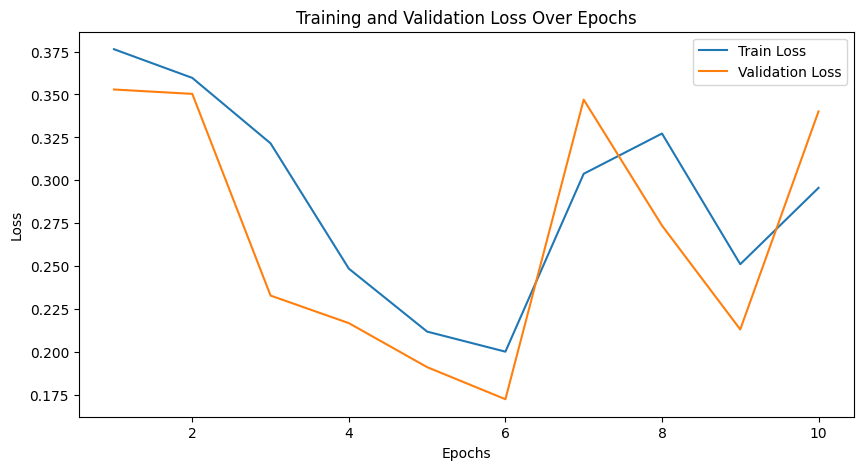

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# 검증

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Testing loop
all_labels = []
all_predictions = []
test_loss = 0.0
correct_predictions = 0
total_predictions = 0
model.eval()

# Load the best model for testing
if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path))
    print("Loaded the best model for testing.")

Loaded the best model for testing.


/tmp/ipykernel_130508/1894909068.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [ ]:
with torch.no_grad():
    test_loader_tqdm = tqdm(test_dataloader, desc="Testing")
    for batch_sequences, batch_labels in test_loader_tqdm:
        batch_sequences, batch_labels = batch_sequences.to(device), batch_labels.to(device)
        outputs = model(batch_sequences)
        loss = criterion(outputs, batch_labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_labels).sum().item()
        total_predictions += batch_labels.size(0)
        all_labels.extend(batch_labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calculate test loss and accuracy
test_epoch_loss = test_loss / len(test_dataloader)
test_epoch_accuracy = correct_predictions / total_predictions
print(f"Test Loss: {test_epoch_loss:.4f}, Test Accuracy: {test_epoch_accuracy:.4f}")

Testing: 100%|██████████████████████████████████| 41/41 [00:01<00:00, 30.70it/s]

Test Loss: 0.1510, Test Accuracy: 0.9634


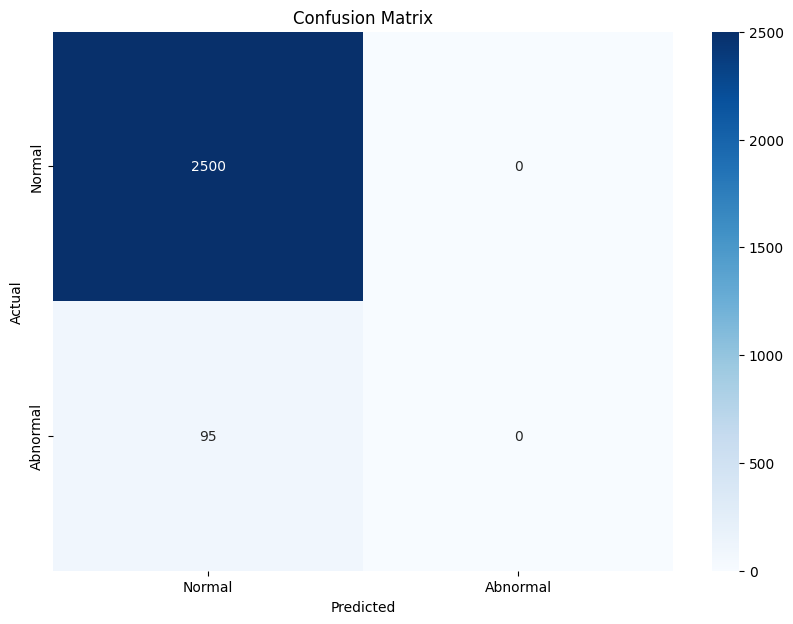

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(all_labels, all_predictions, target_names=['Normal', 'Abnormal'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Normal       0.96      1.00      0.98      2500
    Abnormal       0.00      0.00      0.00        95

    accuracy                           0.96      2595
   macro avg       0.48      0.50      0.49      2595
weighted avg       0.93      0.96      0.95      2595



/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/youngchan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
